参考[陈小米](https://www.joinquant.com/post/702)量宽文章

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as scs
import matplotlib.pyplot as plt

# 日收益率

In [3]:
from zipline.research import returns

In [4]:
assets = ['000001','601118','000333','002024','002273','002030','300159','600771','600649','600866']
start = '2017-01-01'
end = '2018-05-18'

# 年化收益率

In [5]:
df = returns(assets, start, end)

[2018-05-23 12:12:18.167341] INFO: zipline.finance.metrics.tracker: 模拟1个交易日
首个开盘时间: 2018-05-18 01:31:00+00:00
最后收盘时间: 2018-05-18 07:00:00+00:00


In [6]:
# 描述统计
df.describe()

,平安银行(000001),海南橡胶(601118),美的集团(000333),苏宁易购(002024),水晶光电(002273),达安基因(002030),新研股份(300159),广誉远(600771),城投控股(600649),星湖科技(600866)
count,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000
mean,0.000765,-0.000312,0.002300,0.000803,0.000276,-0.000661,-0.000885,0.001654,-0.002883,-0.001483
std,0.018200,0.023423,0.020166,0.019193,0.025226,0.022015,0.017261,0.018267,0.015790,0.018615
min,-0.077143,-0.100000,-0.053725,-0.066051,-0.099905,-0.091983,-0.100000,-0.091248,-0.099945,-0.087912
25%,-0.006542,-0.012048,-0.010817,-0.008922,-0.014383,-0.011472,-0.006305,-0.006874,-0.007541,-0.007270
50%,0.000000,0.000000,0.001359,0.000000,0.000000,0.000000,0.000000,0.000263,0.000000,0.000000
75%,0.007814,0.012449,0.015099,0.009503,0.015580,0.011240,0.004737,0.009353,0.002855,0.006376
max,0.081184,0.100324,0.063276,0.099815,0.100000,0.100000,0.066449,0.085753,0.055396,0.101149


# 股票走势图

In [7]:
data = (1 + df).cumprod()

In [8]:
data.columns = data.columns.map(lambda x:x.symbol)

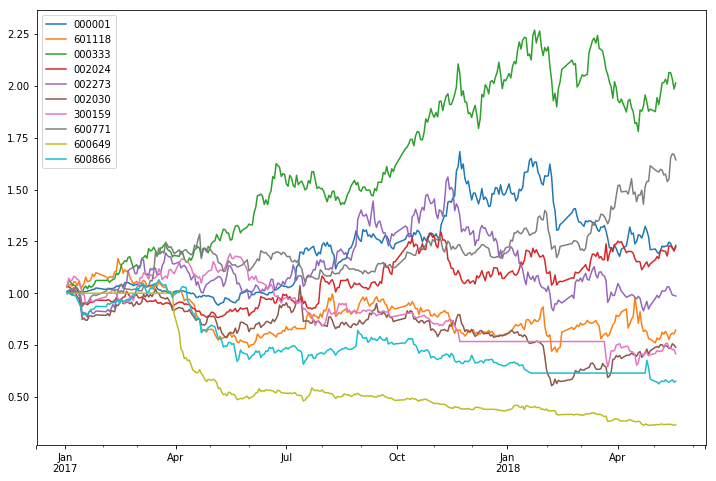

In [9]:
data.plot(figsize=(12,8))

In [10]:
log_returns = np.log1p(df) # ln(1+R_t)
log_returns.columns = log_returns.columns.map(lambda x:x.symbol)
log_returns.head()

,000001,601118,000333,002024,002273,002030,300159,600771,600649,600866
2017-01-03 00:00:00+00:00,0.006557,0.032512,0.033157,0.029286,0.008998,0.000432,0.028275,-0.003895,0.0,0.004228
2017-01-04 00:00:00+00:00,0.000000,0.006930,0.024078,0.000854,0.004494,0.008984,0.041415,0.013123,0.0,-0.001407
2017-01-05 00:00:00+00:00,0.001107,0.001380,-0.004706,-0.003419,0.005911,-0.003430,-0.013151,0.012075,0.0,-0.008487
2017-01-06 00:00:00+00:00,-0.004324,-0.008310,-0.010159,-0.015443,-0.019404,-0.015973,0.004865,-0.003225,0.0,0.005666
2017-01-09 00:00:00+00:00,0.002109,0.020648,-0.004776,-0.001653,0.017917,0.008689,0.017117,0.008190,0.0,-0.011364


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7b7cfe97b8>,
      dtype=object)

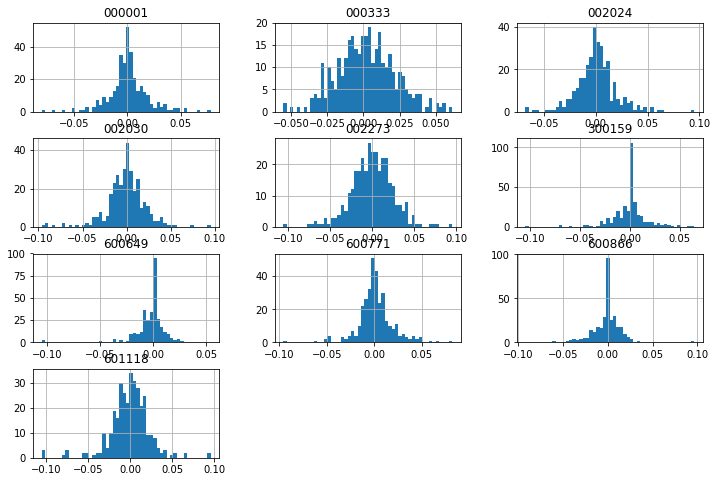

In [11]:
log_returns.hist(bins = 50, figsize = (12,8))

# 统计数据

In [12]:
#定义print_statistics函数，为了更加易于理解的方式
#输出给定(历史或者模拟)数据集均值、偏斜度或者峰度等统计数字
def print_statistics(array):
    sta = scs.describe(array)
    print('%14s %15s' % ('statistic', 'value'))
    print(30 * '-')
    print('%14s %15d' % ('size', sta[0]))
    print('%14s %15.5f' % ('min', sta[1][0]))
    print('%14s %15.5f' % ('max', sta[1][1]))
    print('%14s %15.5f' % ('mean', sta[2]))
    print('%14s %15.5f' % ('std', np.sqrt(sta[3])))
    print('%14s %15.5f' % ('skew', sta[4]))
    print('%14s %15.5f' % ('kurtosis', sta[5]))


for st in log_returns.columns:
    print('\nResults for stock %s' % st)
    print(30 * '-')
    log_data = np.array(log_returns[st].dropna())
    print_statistics(log_data)


Results for stock 000001
------------------------------
     statistic           value
------------------------------
          size             334
           min        -0.08028
           max         0.07806
          mean         0.00060
           std         0.01818
          skew        -0.01295
      kurtosis         3.38879

Results for stock 601118
------------------------------
     statistic           value
------------------------------
          size             334
           min        -0.10536
           max         0.09560
          mean        -0.00059
           std         0.02358
          skew        -0.60171
      kurtosis         4.76752

Results for stock 000333
------------------------------
     statistic           value
------------------------------
          size             334
           min        -0.05522
           max         0.06135
          mean         0.00210
           std         0.02009
          skew         0.13907
      kurtosis         

# `qq`图

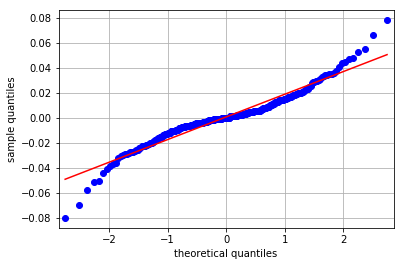

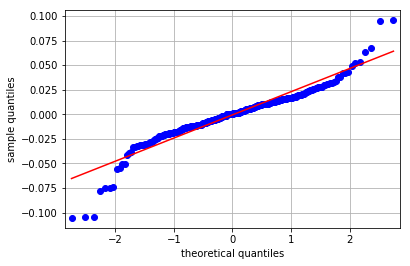

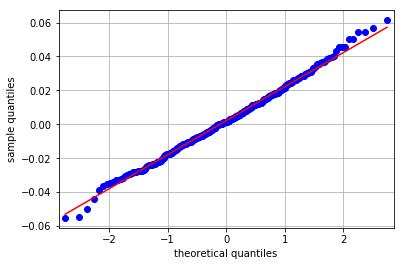

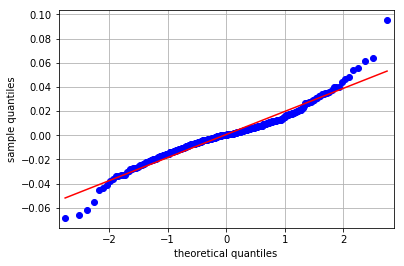

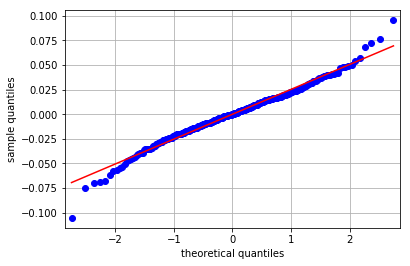

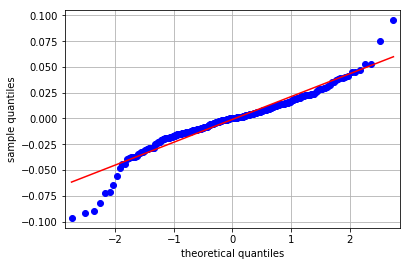

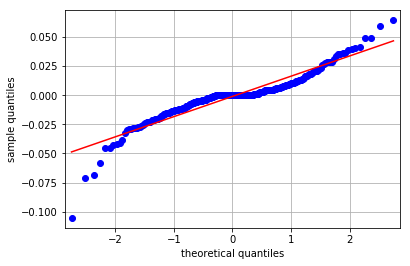

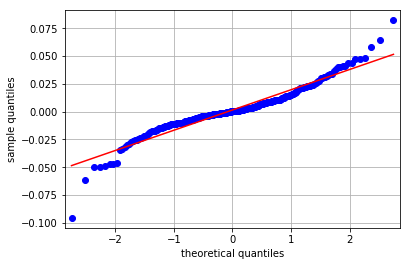

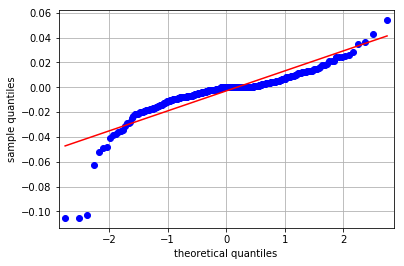

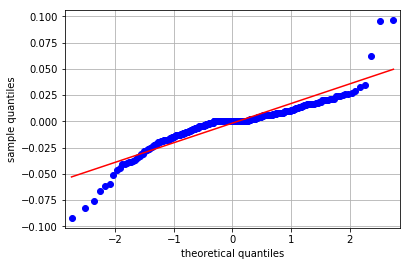

In [13]:
for st in log_returns.columns:
    sm.qqplot(log_returns[st].dropna(),line = 's')
    plt.grid(True)
    plt.xlabel('theoretical quantiles')
    plt.ylabel('sample quantiles')

很显然，样本的分位数值不在一条直线上，表明“非正态性”。左侧和右侧分别有许多值远低于和远高于直线。这是典型的Fat tails。 Fat tails是频数分布中观察到的两端的异常值。

# 正态性检验

In [14]:
def normality_test(array):
    '''
    对给定的数据集进行正态性检验
    组合了3种统计学测试
    偏度测试（Skewtest）——足够接近0
    峰度测试（Kurtosistest)——足够接近0
    正态性测试
    '''
    print('Skew of data set %15.3f' % scs.skew(array))
    print('Skew test p-value %14.3f' % scs.skewtest(array)[1])
    print('Kurt of data set %15.3f' % scs.kurtosis(array))
    print('Kurt test p-value %14.3f' % scs.kurtosistest(array)[1])
    print('Norm test p-value %14.3f' % scs.normaltest(array)[1])


for st in log_returns.columns:
    print('\nResults for st %s' % st)
    print(32 * '-')
    log_data = np.array(log_returns[st].dropna())
    normality_test(log_data)


Results for st 000001
--------------------------------
Skew of data set          -0.013
Skew test p-value          0.921
Kurt of data set           3.389
Kurt test p-value          0.000
Norm test p-value          0.000

Results for st 601118
--------------------------------
Skew of data set          -0.602
Skew test p-value          0.000
Kurt of data set           4.768
Kurt test p-value          0.000
Norm test p-value          0.000

Results for st 000333
--------------------------------
Skew of data set           0.139
Skew test p-value          0.291
Kurt of data set           0.091
Kurt test p-value          0.599
Norm test p-value          0.499

Results for st 002024
--------------------------------
Skew of data set           0.312
Skew test p-value          0.020
Kurt of data set           3.066
Kurt test p-value          0.000
Norm test p-value          0.000

Results for st 002273
--------------------------------
Skew of data set          -0.162
Skew test p-value          

# 相关系数、协方差、标准差

In [15]:
# 相关系数
df.corr()

,平安银行(000001),海南橡胶(601118),美的集团(000333),苏宁易购(002024),水晶光电(002273),达安基因(002030),新研股份(300159),广誉远(600771),城投控股(600649),星湖科技(600866)
平安银行(000001),1.000000,0.019428,0.306354,0.128785,0.041178,0.176723,-0.032942,-0.008884,0.084698,0.036660
海南橡胶(601118),0.019428,1.000000,0.083933,0.244355,0.236486,0.324961,0.162214,0.206146,0.185942,0.240926
美的集团(000333),0.306354,0.083933,1.000000,0.206484,0.107375,0.101286,0.052968,0.138182,0.108093,0.062895
苏宁易购(002024),0.128785,0.244355,0.206484,1.000000,0.331655,0.342583,0.135718,0.230337,0.176795,0.187186
水晶光电(002273),0.041178,0.236486,0.107375,0.331655,1.000000,0.319834,0.236585,0.227311,0.211000,0.390050
达安基因(002030),0.176723,0.324961,0.101286,0.342583,0.319834,1.000000,0.276875,0.303701,0.208995,0.313564
新研股份(300159),-0.032942,0.162214,0.052968,0.135718,0.236585,0.276875,1.000000,0.236936,0.080788,0.214750
广誉远(600771),-0.008884,0.206146,0.138182,0.230337,0.227311,0.303701,0.236936,1.000000,0.217239,0.188252
城投控股(600649),0.084698,0.185942,0.108093,0.176795,0.211000,0.208995,0.080788,0.217239,1.000000,0.263962
星湖科技(600866),0.036660,0.240926,0.062895,0.187186,0.390050,0.313564,0.214750,0.188252,0.263962,1.000000


In [16]:
# 计算列的成对协方差
df.cov()

,平安银行(000001),海南橡胶(601118),美的集团(000333),苏宁易购(002024),水晶光电(002273),达安基因(002030),新研股份(300159),广誉远(600771),城投控股(600649),星湖科技(600866)
平安银行(000001),0.000331,0.000008,0.000112,0.000045,0.000019,0.000071,-0.000010,-0.000003,0.000024,0.000012
海南橡胶(601118),0.000008,0.000549,0.000040,0.000110,0.000140,0.000168,0.000066,0.000088,0.000069,0.000105
美的集团(000333),0.000112,0.000040,0.000407,0.000080,0.000055,0.000045,0.000018,0.000051,0.000034,0.000024
苏宁易购(002024),0.000045,0.000110,0.000080,0.000368,0.000161,0.000145,0.000045,0.000081,0.000054,0.000067
水晶光电(002273),0.000019,0.000140,0.000055,0.000161,0.000636,0.000178,0.000103,0.000105,0.000084,0.000183
达安基因(002030),0.000071,0.000168,0.000045,0.000145,0.000178,0.000485,0.000105,0.000122,0.000073,0.000128
新研股份(300159),-0.000010,0.000066,0.000018,0.000045,0.000103,0.000105,0.000298,0.000075,0.000022,0.000069
广誉远(600771),-0.000003,0.000088,0.000051,0.000081,0.000105,0.000122,0.000075,0.000334,0.000063,0.000064
城投控股(600649),0.000024,0.000069,0.000034,0.000054,0.000084,0.000073,0.000022,0.000063,0.000249,0.000078
星湖科技(600866),0.000012,0.000105,0.000024,0.000067,0.000183,0.000128,0.000069,0.000064,0.000078,0.000347


In [17]:
# 标准差
df.std()

平安银行(000001)    0.018200
海南橡胶(601118)    0.023423
美的集团(000333)    0.020166
苏宁易购(002024)    0.019193
水晶光电(002273)    0.025226
达安基因(002030)    0.022015
新研股份(300159)    0.017261
广誉远(600771)     0.018267
城投控股(600649)    0.015790
星湖科技(600866)    0.018615
dtype: float64

# 最终收益率

In [18]:
# 后续使用变量
days_of_year, num_of_asset = df.shape

In [19]:
final_rets = (1 + df).cumprod().iloc[-1,:] - 1

In [20]:
final_rets

平安银行(000001)    0.221987
海南橡胶(601118)   -0.178161
美的集团(000333)    1.014203
苏宁易购(002024)    0.230106
水晶光电(002273)   -0.013786
达安基因(002030)   -0.260843
新研股份(300159)   -0.292244
广誉远(600771)     0.643242
城投控股(600649)   -0.634710
星湖科技(600866)   -0.425141
Name: 2018-05-18 00:00:00+00:00, dtype: float64

# 随机分配权重

In [21]:
weights = np.random.random(num_of_asset)
weights /= np.sum(weights)
weights

array([0.17734826, 0.06799109, 0.05777635, 0.15783834, 0.10102407,
       0.14111444, 0.10271032, 0.08175237, 0.08647811, 0.02596665])

# 计算投资组合收益、方差和标准差

In [22]:
np.sum(final_rets * weights)

0.040612755756887636

In [23]:
np.dot(weights.T, np.dot(df.cov(), weights))

0.0001121583188077412

In [24]:
np.sqrt(np.dot(weights.T, np.dot(df.cov(), weights)))

0.010590482463407472

# 蒙特卡洛模拟随机组合

通过蒙特卡洛模拟，产生随机的权重向量，记录随机组合的预期收益和方差。

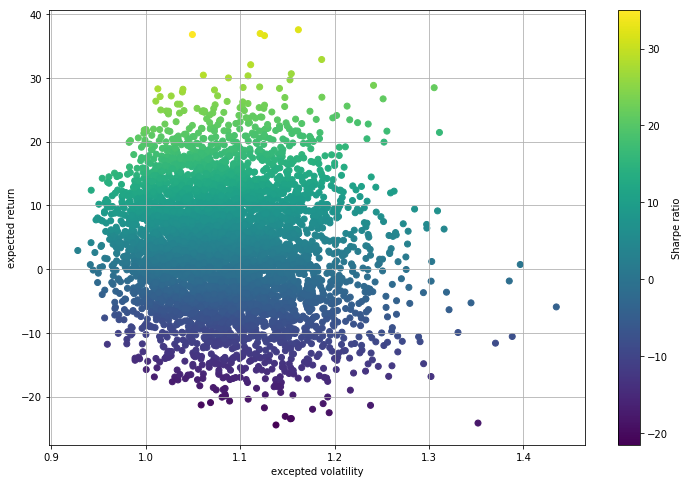

In [25]:
port_returns = []
port_variance = []
for p in range(5000):
    weights = np.random.random(num_of_asset)
    weights /=np.sum(weights)
    port_returns.append(np.sum(final_rets*weights*100))
    port_variance.append(np.sqrt(np.dot(weights.T, np.dot(df.multiply(100).cov(), weights))))

port_returns = np.array(port_returns)
port_variance = np.array(port_variance)

#无风险利率设定为4%
risk_free = 0.04
plt.figure(figsize = (12,8))
plt.scatter(port_variance, port_returns, c=(port_returns-risk_free)/port_variance, marker = 'o')
plt.grid(True)
plt.xlabel('excepted volatility')
plt.ylabel('expected return')
plt.colorbar(label = 'Sharpe ratio')

# 投资组合优化1——sharpe最大

建立statistics函数来记录重要的投资组合统计数据（收益，方差和夏普比）

通过对约束最优问题的求解，得到最优解。其中约束是权重总和为1。

In [26]:
def statistics(weights):
    weights = np.array(weights)
    port_returns = np.sum(final_rets*weights*100)
    port_variance = np.sqrt(np.dot(weights.T, np.dot(df.multiply(100).cov(),weights)))
    return np.array([port_returns, port_variance, port_returns/port_variance])

#最优化投资组合的推导是一个约束最优化问题
import scipy.optimize as sco

#最小化夏普指数的负值
def min_sharpe(weights):
    return -statistics(weights)[2]

#约束是所有参数(权重)的总和为1。这可以用minimize函数的约定表达如下
cons = ({'type':'eq', 'fun':lambda x: np.sum(x)-1})

#我们还将参数值(权重)限制在0和1之间。这些值以多个元组组成的一个元组形式提供给最小化函数
bnds = tuple((0,1) for x in range(num_of_asset))

#优化函数调用中忽略的唯一输入是起始参数列表(对权重的初始猜测)。我们简单的使用平均分布。
opts = sco.minimize(min_sharpe, num_of_asset*[1./num_of_asset,], method = 'SLSQP', bounds = bnds, constraints = cons)
opts

     fun: -57.825560365700035
     jac: array([ 2.11472607e+00,  2.73555799e+01,  1.12056732e-04,  5.41386127e+00,
        2.03964539e+01,  3.72989411e+01,  3.03098812e+01, -1.62124634e-04,
        5.44381399e+01,  3.88783097e+01])
 message: 'Optimization terminated successfully.'
    nfev: 96
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([0.00000000e+00, 0.00000000e+00, 5.92820863e-01, 0.00000000e+00,
       0.00000000e+00, 5.64599545e-12, 3.76361994e-13, 4.07179137e-01,
       1.45481836e-11, 5.18161262e-12])

得到的**最优组合权重向量**为：

In [27]:
opts['x'].round(3)

array([0.   , 0.   , 0.593, 0.   , 0.   , 0.   , 0.   , 0.407, 0.   ,
       0.   ])

sharpe最大的组合3个统计数据分别为：

In [28]:
#预期收益率、预期波动率、最优夏普指数
statistics(opts['x']).round(3)

array([86.316,  1.493, 57.826])

# 投资组合优化2——方差最小

接下来，我们通过方差最小来选出最优投资组合。

In [29]:
def min_variance(weights):
    return statistics(weights)[1]

optv = sco.minimize(min_variance, num_of_asset*[1./num_of_asset,],method = 'SLSQP', bounds = bnds, constraints = cons)
optv

     fun: 0.9103645648692233
     jac: array([0.91030753, 0.91129819, 0.91061316, 0.91097147, 1.01252493,
       1.06009453, 0.91030672, 0.91064475, 0.90969941, 0.91054498])
 message: 'Optimization terminated successfully.'
    nfev: 147
     nit: 12
    njev: 12
  status: 0
 success: True
       x: array([1.98830429e-01, 4.30144610e-02, 8.50375404e-02, 7.58312642e-02,
       7.86448221e-18, 1.46641845e-17, 1.94960304e-01, 1.08254162e-01,
       1.98770428e-01, 9.53014112e-02])

方差最小的最优组合权重向量及组合的统计数据分别为：

In [30]:
optv['x'].round(3)

array([0.199, 0.043, 0.085, 0.076, 0.   , 0.   , 0.195, 0.108, 0.199,
       0.095])

In [31]:
#得到的预期收益率、波动率和夏普指数
statistics(optv['x']).round(3)

array([-1.385,  0.91 , -1.522])

# 有效前沿

有效前沿有既定的目标收益率下方差最小的投资组合构成。

在最优化时采用两个约束，1.给定目标收益率，2.投资组合权重和为1。

In [32]:
def min_variance(weights):
    return statistics(weights)[1]

#在不同目标收益率水平（target_returns）循环时，最小化的一个约束条件会变化。
target_returns = np.linspace(0.0,0.5,50)
target_variance = []
for tar in target_returns:
    cons = ({'type':'eq','fun':lambda x:statistics(x)[0]-tar},{'type':'eq','fun':lambda x:np.sum(x)-1})
    res = sco.minimize(min_variance, num_of_asset*[1./num_of_asset,],method = 'SLSQP', bounds = bnds, constraints = cons)
    target_variance.append(res['fun'])

target_variance = np.array(target_variance)


下面是最优化结果的展示。

+ 叉号：构成的曲线是有效前沿（目标收益率下最优的投资组合）

+ 红星：sharpe最大的投资组合

+ 黄星：方差最小的投资组合

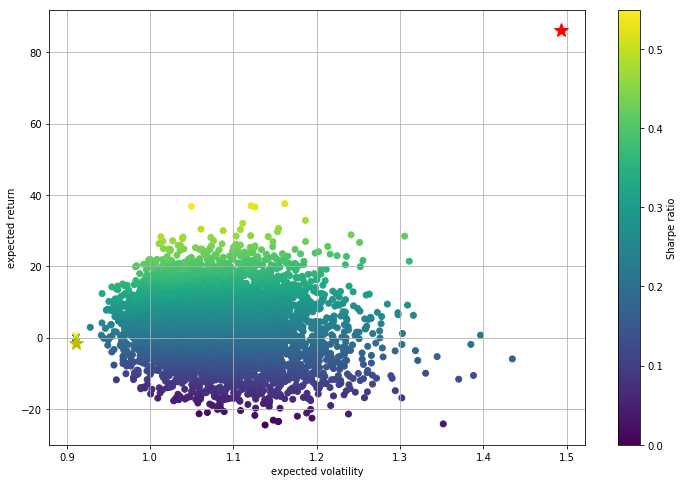

In [33]:
plt.figure(figsize = (12,8))
#圆圈：蒙特卡洛随机产生的组合分布
plt.scatter(port_variance, port_returns, c = port_returns/port_variance,marker = 'o')
#叉号：有效前沿
plt.scatter(target_variance,target_returns, c = target_returns/target_variance, marker = 'x')
#红星：标记最高sharpe组合
plt.plot(statistics(opts['x'])[1], statistics(opts['x'])[0], 'r*', markersize = 15.0)
#黄星：标记最小方差组合
plt.plot(statistics(optv['x'])[1], statistics(optv['x'])[0], 'y*', markersize = 15.0)
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label = 'Sharpe ratio')